<a href="https://colab.research.google.com/github/Swap-Pro/DiffEdit/blob/main/DiffEdit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q diffusers transformers accelerate


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 116.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 101.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 50.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 42.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 107.3 MB/s eta 0:00:00


In [ ]:
from diffusers import StableDiffusionDiffEditPipeline, DDIMScheduler, DDIMInverseScheduler
from diffusers.utils import load_image, make_image_grid
from PIL import Image

# Example: load an image from a URL (replace with your own image as needed)
img_url = "/content/photo_2025-05-27_15-44-18.jpg"
raw_image = load_image(img_url).resize((768, 768))
raw_image.show()

In [ ]:
pipeline = StableDiffusionDiffEditPipeline.from_pretrained(
    "stabilityai/stable-diffusion-2-1", torch_dtype="float16"
).to("cuda")

# Explicitly set both schedulers (required for invert to work)
pipeline.scheduler = DDIMScheduler.from_config(pipeline.scheduler.config)
pipeline.inverse_scheduler = DDIMInverseScheduler.from_config(pipeline.scheduler.config)


Passed `torch_dtype` torch.float32 is not a `torch.dtype`. Defaulting to `torch.float32`.


model_index.json:   0%|          | 0.00/537 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.36G [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/633 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


scheduler_config.json:   0%|          | 0.00/345 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/824 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/939 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.46G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/611 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

The config attributes {'skip_prk_steps': True} were passed to DDIMInverseScheduler, but are not expected and will be ignored. Please verify your scheduler_config.json configuration file.


In [ ]:
source_prompt = "a car with a license plate"
# target_prompt = "a car with a license plate reading ABC123"
target_prompt = "A car with an Egyptian license plate reading 'ط ر د ٨١٢٦"


In [ ]:
mask_image = pipeline.generate_mask(
    image=raw_image,
    source_prompt=source_prompt,
    target_prompt=target_prompt,
)
# Convert to PIL for visualization
mask_image_pil = Image.fromarray((mask_image.squeeze()*255).astype("uint8"), "L").resize(raw_image.size)
mask_image_pil.show()


In [ ]:
inv_latents = pipeline.invert(prompt=source_prompt, image=raw_image).latents


  0%|          | 0/40 [00:00<?, ?it/s]

In [ ]:
output = pipeline(
    prompt=target_prompt,
    mask_image=mask_image,  # Keep as numpy array for the pipeline
    image_latents=inv_latents,
    negative_prompt=source_prompt,
)
output_image = output.images[0]


  0%|          | 0/40 [00:00<?, ?it/s]

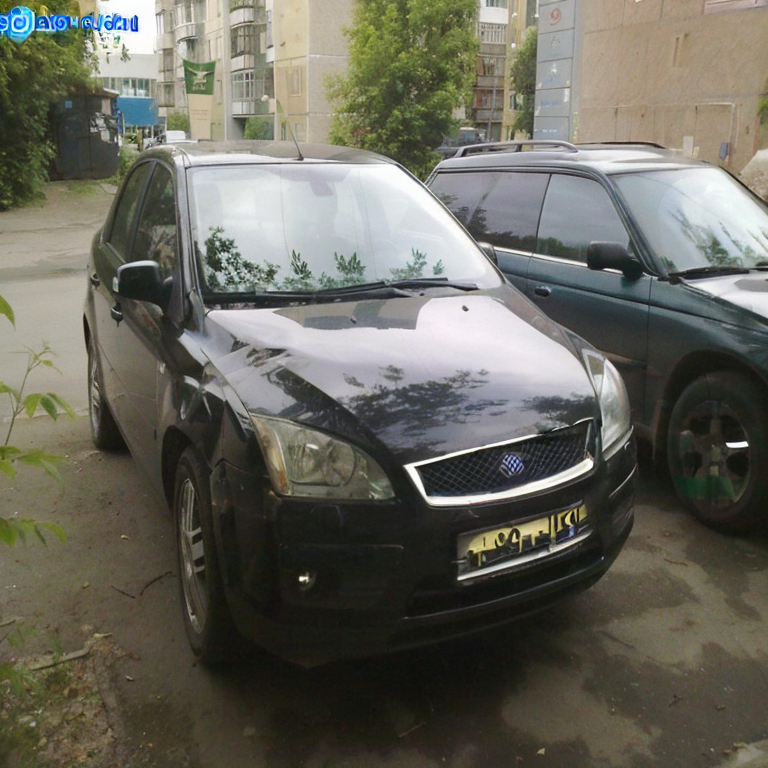

In [ ]:
from IPython.display import display

# Show just the output
display(output_image)

# Or show a grid of original, mask, and result
make_image_grid([raw_image, mask_image_pil, output_image], rows=1, cols=3).show()


In [ ]:
!pip install -q diffusers transformers accelerate torch torchvision


In [ ]:
import torch
import PIL
from PIL import Image
from diffusers import DiffusionPipeline
from diffusers.utils import load_image, make_image_grid
from IPython.display import display
import requests
from io import BytesIO


In [ ]:
# Load Paint by Example pipeline (specialized for exemplar-guided editing)
pipe = DiffusionPipeline.from_pretrained(
    "Fantasy-Studio/Paint-by-Example",
    torch_dtype=torch.float16,
).to("cuda")


model_index.json:   0%|          | 0.00/498 [00:00<?, ?B/s]

Fetching 9 files:   0%|          | 0/9 [00:00<?, ?it/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/335M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/518 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/877 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/553 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/524 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.47G [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/346 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

An error occurred while trying to fetch /root/.cache/huggingface/hub/models--Fantasy-Studio--Paint-by-Example/snapshots/351e6427d8c28a3b24f7c751d43eb4b6735127f7/unet: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--Fantasy-Studio--Paint-by-Example/snapshots/351e6427d8c28a3b24f7c751d43eb4b6735127f7/unet.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
An error occurred while trying to fetch /root/.cache/huggingface/hub/models--Fantasy-Studio--Paint-by-Example/snapshots/351e6427d8c28a3b24f7c751d43eb4b6735127f7/vae: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--Fantasy-Studio--Paint-by-Example/snapshots/351e6427d8c28a3b24f7c751d43eb4b6735127f7/vae.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
You are using a model of type clip_vision_model to instantiate a model of type clip. T

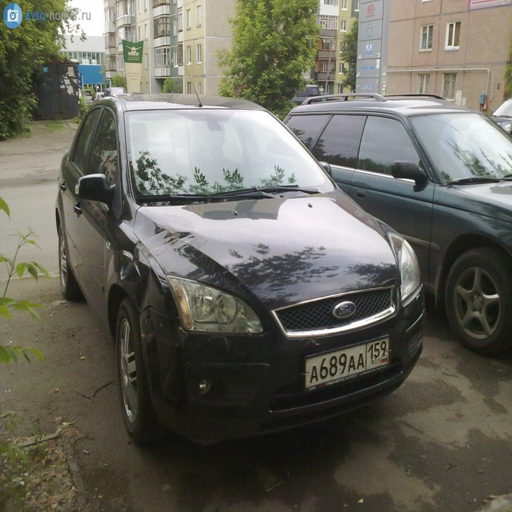

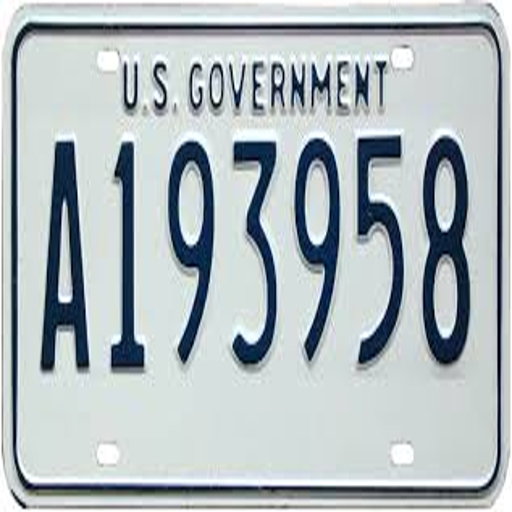

In [ ]:
# Load your car image
car_image_path = "/content/photo_2025-05-27_15-44-18.jpg"  # Replace with your car image path
init_image = load_image(car_image_path).resize((512, 512))

# Load your Egyptian license plate image
egypt_plate_path = "/content/usPlate1.jpeg"  # Your Egyptian plate image
example_image = load_image(egypt_plate_path).resize((512, 512))

# Display both images
display(init_image)
display(example_image)


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

The config attributes {'skip_prk_steps': True} were passed to DDIMInverseScheduler, but are not expected and will be ignored. Please verify your scheduler_config.json configuration file.


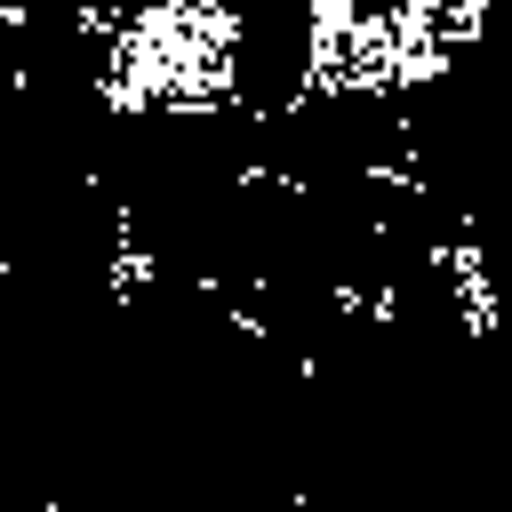

In [ ]:
# Option A: Auto-generate mask using DiffEdit approach
from diffusers import StableDiffusionDiffEditPipeline

# Load DiffEdit for automatic mask generation
diffedit_pipe = StableDiffusionDiffEditPipeline.from_pretrained(
    "stabilityai/stable-diffusion-2-1",
    torch_dtype=torch.float16
).to("cuda")

# Configure schedulers
from diffusers import DDIMScheduler, DDIMInverseScheduler
diffedit_pipe.scheduler = DDIMScheduler.from_config(diffedit_pipe.scheduler.config)
diffedit_pipe.inverse_scheduler = DDIMInverseScheduler.from_config(diffedit_pipe.scheduler.config)

# Generate mask for license plate area
mask_array = diffedit_pipe.generate_mask(
    image=init_image,
    source_prompt="car with license plate",
    target_prompt="car with different license plate"
)

# Convert mask to PIL Image
mask_image = Image.fromarray(
    (mask_array.squeeze() * 255).astype("uint8"), "L"
).resize((512, 512))

display(mask_image)


  0%|          | 0/50 [00:00<?, ?it/s]

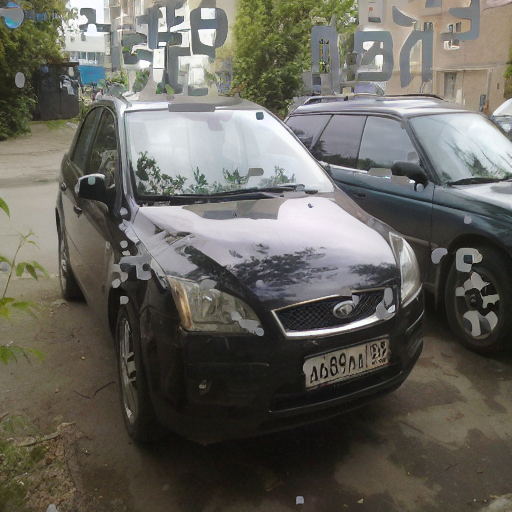

In [ ]:
# Use Paint by Example to replace with Egyptian plate
result = pipe(
    image=init_image,           # Original car image
    mask_image=mask_image,      # License plate mask
    example_image=example_image, # Egyptian license plate
    num_inference_steps=50,
    guidance_scale=5.0
).images[0]

# Display result
display(result)


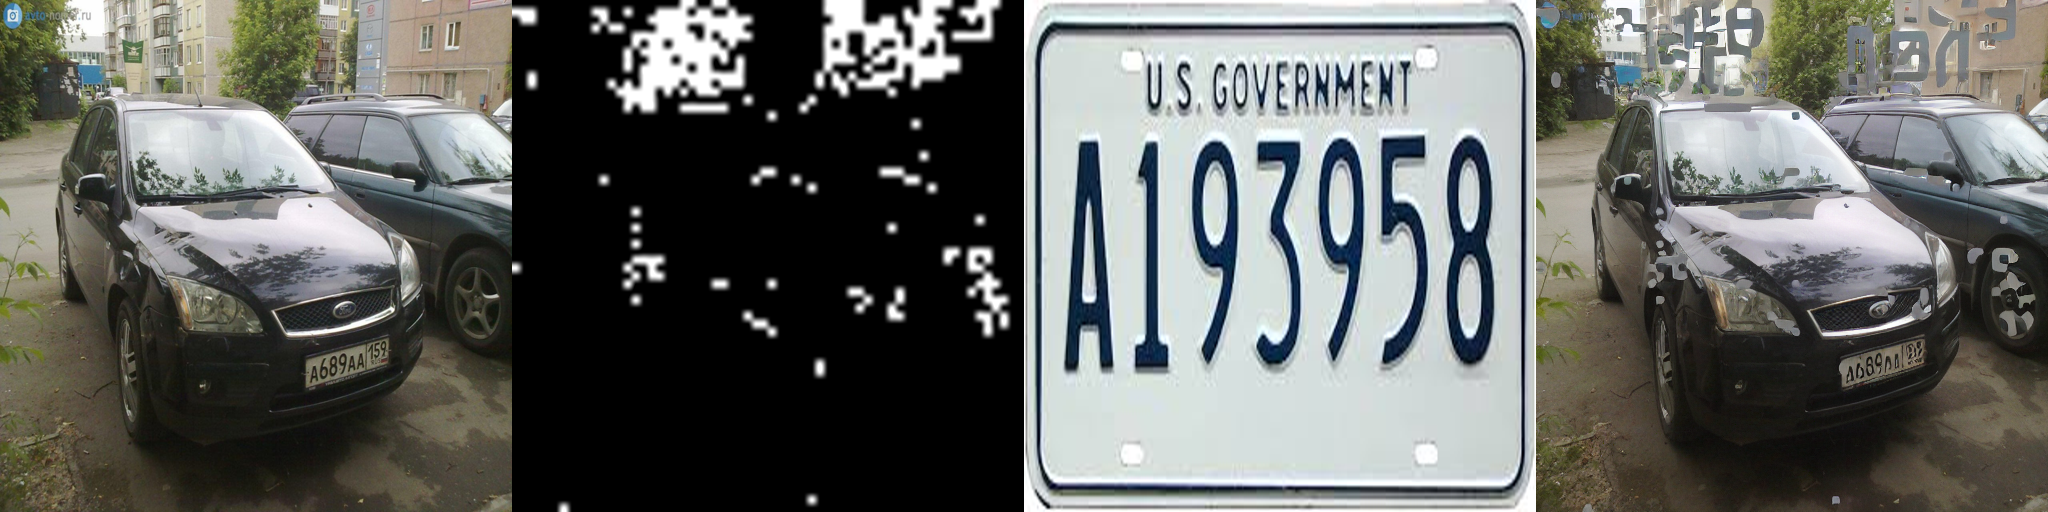

In [ ]:
# Show before/after comparison
comparison_grid = make_image_grid(
    [init_image, mask_image, example_image, result],
    rows=1,
    cols=4
)
display(comparison_grid)


In [ ]:
from diffusers import StableDiffusionDiffEditPipeline, DDIMScheduler, DDIMInverseScheduler

# Initialize DiffEdit pipeline
diffedit_pipe = StableDiffusionDiffEditPipeline.from_pretrained(
    "stabilityai/stable-diffusion-2-1",
    torch_dtype=torch.float16
).to("cuda")

# Configure schedulers (critical for inversion)
diffedit_pipe.scheduler = DDIMScheduler.from_config(diffedit_pipe.scheduler.config)
diffedit_pipe.inverse_scheduler = DDIMInverseScheduler.from_config(diffedit_pipe.scheduler.config)

# Generate mask
mask = diffedit_pipe.generate_mask(
    image=raw_image,
    source_prompt="car with license plate",
    target_prompt="car with license plate area"  # Broad target to capture plate region
)
mask_pil = Image.fromarray((mask.squeeze()*255).astype("uint8"), "L").resize(raw_image.size)


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

The config attributes {'skip_prk_steps': True} were passed to DDIMInverseScheduler, but are not expected and will be ignored. Please verify your scheduler_config.json configuration file.


In [ ]:
import cv2
import numpy as np

# Convert to numpy array
mask_np = np.array(mask_pil)

# Threshold and clean up
_, binary_mask = cv2.threshold(mask_np, 128, 255, cv2.THRESH_BINARY)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
cleaned_mask = cv2.morphologyEx(binary_mask, cv2.MORPH_CLOSE, kernel)

# Blur edges for smoother blending
final_mask = cv2.GaussianBlur(cleaned_mask, (5,5), 0)
mask_pil = Image.fromarray(final_mask)


In [ ]:
from diffusers import StableDiffusionInpaintPipeline

# Load inpainting-optimized model
inpaint_pipe = StableDiffusionInpaintPipeline.from_pretrained(
    "stabilityai/stable-diffusion-2-inpainting",
    torch_dtype=torch.float16
).to("cuda")

# Generate with plate-specific prompt
output = inpaint_pipe(
    prompt="crisp Egyptian license plate 'ABC-123', modern sans-serif font",
    image=raw_image,
    mask_image=mask_pil,
    negative_prompt="blurry text, incorrect characters",
    num_inference_steps=50,
    guidance_scale=12  # Higher for text fidelity
).images[0]


model_index.json:   0%|          | 0.00/544 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/1.36G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/829 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/638 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.46G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/914 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/616 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

In [ ]:
from skimage.exposure import match_histograms

# Match color histograms between generated plate and reference
reference_plate = load_image("/content/egyptplate.jpg")
generated_np = np.array(output)
reference_np = np.array(reference_plate.resize(output.size))

# Apply histogram matching only to masked area
matched = match_histograms(
    generated_np,
    reference_np,
    channel_axis=-1,
    # multichannel=True
)
final_image = Image.fromarray(matched)


ValueError: Incorrect path or URL. URLs must start with `http://` or `https://`, and /content/egyptplate.jpg is not a valid path.

In [ ]:
from IPython.display import display

display(final_image)


In [ ]:
result = inpaint_pipe(
    prompt="crisp Egyptian license plate 'ABC-123', modern sans-serif font",
    image=raw_image,
    mask_image=mask_pil,
    negative_prompt="blurry text, incorrect characters",
    num_inference_steps=50,
    guidance_scale=12
).images[0]


In [ ]:
from IPython.display import display
display(result)


In [ ]:
import torch
from diffusers import StableDiffusionDiffEditPipeline, DDIMScheduler, DDIMInverseScheduler
from diffusers.utils import load_image
from PIL import Image

# Load your car image
raw_image = load_image("/content/photo_2025-05-27_15-44-18.jpg").resize((768, 768))

# Load the DiffEdit pipeline
pipeline = StableDiffusionDiffEditPipeline.from_pretrained(
    "stabilityai/stable-diffusion-2-1", torch_dtype=torch.float16
).to("cuda")

# Configure schedulers (required for invert and mask)
pipeline.scheduler = DDIMScheduler.from_config(pipeline.scheduler.config)
pipeline.inverse_scheduler = DDIMInverseScheduler.from_config(pipeline.scheduler.config)

# Define prompts to localize the plate
source_prompt = "a car with a license plate"
target_prompt = "a car with a blank plate"  # or "a car with a different license plate"

# Generate mask (numpy array)
mask_image = pipeline.generate_mask(
    image=raw_image,
    source_prompt=source_prompt,
    target_prompt=target_prompt
)

# Convert mask to PIL Image for use in other pipelines
mask_image_pil = Image.fromarray((mask_image.squeeze() * 255).astype("uint8"), "L").resize(raw_image.size)
mask_image_pil.save("mask_image.png")


In [ ]:
from diffusers import DiffusionPipeline

# Load Paint by Example pipeline
pipe = DiffusionPipeline.from_pretrained(
    "Fantasy-Studio/Paint-by-Example",
    torch_dtype=torch.float16,
).to("cuda")

# Load your plate image and resize to match
example_image = Image.open("/content/egyptplate.jpg").resize((768, 768))

# Run the model
result = pipe(
    image=raw_image,
    mask_image=mask_image_pil,
    example_image=example_image
).images[0]

result.show()


In [ ]:
from IPython.display import display
display(result)


In [ ]:
import numpy as np
from PIL import Image, ImageFilter

# Convert to binary
mask_np = np.array(mask_image_pil)
mask_bin = (mask_np > 128).astype(np.uint8) * 255
mask_clean = Image.fromarray(mask_bin).filter(ImageFilter.GaussianBlur(radius=2))
mask_clean.save("cleaned_mask.png")


In [ ]:
result = pipe(
    image=init_image,
    mask_image=mask_clean,
    example_image=example_image,
    num_inference_steps=75,      # default is 50
    guidance_scale=10            # try 8-12
).images[0]


In [ ]:
result = pipe(
    image=raw_image, # Changed from init_image to raw_image
    mask_image=mask_clean,
    example_image=example_image,
    num_inference_steps=75,
    guidance_scale=10
).images[0]

In [ ]:
from IPython.display import display
display(result)